# Lecture 4 - Reshaping in Pandas - Pivot, Pivot-Table, Stack and Unstack

In Pandas data reshaping means the transformation of the structure of a table or vector (i.e. DataFrame or Series) to make it suitable for further analysis.


## Pivot
The pivot function is used to create a new derived table out of a given one. 

`pd.pivot(data, index=['Row_index_name1','Row_index_name2,..'], columns=['Column_index_name', ...],values=['Columns_values']`)

![Pivot](img/pivot.png)

Before calling pivot we need to ensure that our data does not have rows with duplicate values for the specified columns. If we can’t ensure this we may have to use the pivot_table method instead.




## Pivot Table

A pivot table is a table that summarizes data in another table, and is made by applying an operation such as sorting, averaging, or summing to data in the first table, typically including grouping of the data. 


The Pivot table is a versatile tool that can be useful for many Data problems. It allows for quick and powerful grouping to gather trend information quickly. Although it is not a substitute for data visualisation, it helps in deciding which columns/variables may or may not have an impact on another through summarizing the information.

The tool allows us to notice and explore trends briefly, enabling us to further define our story or problem and which steps we need to take to further/solve it.


Pivoting might be beneficial when you have a data where there is several rows with the same key information. 


![pivot_table](img/pivot_table.png)


`.pivot_table(data, index=['Row_index_name1','Row_index_name2,..'], columns=['Column_index_name', ...],values=['Columns_values']`)

## Aggregation 

To specify the aggregation function: 

`pd.pivot_table(data, index=[""],columns= values=[""], aggfunc= )` / aggfunc can be np.median or other function.


To apply multiple aggregations 
`pd.pivot_table(data, index=" ", values=[" "], aggfunc=[fn1, fn2, fn3]`


## Nested Pivoting
Nested pivoting is when we apply pivoting according to several rows.


## Fixing heirarchical columns
This will create heirarchical columns. To fix this:
`data.columns = data.columns.get_level_values(1)`

## Applying Operations
A pivot table tends to include nested items, making it inconvenient for applying operations. To assist in making the dataframe more malleable, it’s best to reset the index using `.reset_index()`

## Similarity to GroupBy
Pivoting a table is similar to the GroupBy method we learned last week.

Both pivot_table and groupby are used to aggregate your dataframe. The difference is only with regard to the shape of the result.

Using pd.pivot_table(df, index=["a"], columns=["b"], values=["c"], aggfunc=np.sum) a table is created where a is on the row axis, b is on the column axis, and the values are the sum of c.



In [1]:
import numpy as np
import pandas as pd

df = pd.DataFrame({"a": [1,2,3,1,2,3], "b":[1,1,1,2,2,2], "c":np.random.rand(6)})
df

,a,b,c
0,1,1,0.509744
1,2,1,0.871218
2,3,1,0.274496
3,1,2,0.322638
4,2,2,0.566557
5,3,2,0.604607


In [3]:
pd.pivot_table(df, index=["a"], columns=["b"], values=["c"], aggfunc=np.sum)



c          
b         1         2
a                    
1  0.509744  0.322638
2  0.871218  0.566557
3  0.274496  0.604607

Using groupby, the dimensions given are placed into columns, and rows are created for each combination of those dimensions.

In this example, we create a series of the sum of values c, grouped by all unique combinations of a and b.

In [4]:
df.groupby(['a','b'])['c'].sum()


a  b
1  1    0.509744
   2    0.322638
2  1    0.871218
   2    0.566557
3  1    0.274496
   2    0.604607
Name: c, dtype: float64

## Stack/Unstack

In fact pivoting a table is a special case of stacking a DataFrame. Let us assume we have a DataFrame with MultiIndices on the rows and columns.
- **Stacking** a DataFrame means moving (also rotating or pivoting) the **innermost column index to become the innermost row index**. 
- The inverse operation is called **unstacking**. It means **moving the innermost row index to become the innermost column index**. 

![stack_unstack](img/stack_unstack.png)

![stack_unstack_ex](img/stack_unstack_ex.png)

## Unpivoting a pivoted table
Unpivoting this again is a little messy... here's a recipe that flattens it out and then fixes column names. (from http://stackoverflow.com/a/18259530)
You can also try using melt.

`unpivoted = pivoted_data.unstack().reset_index()`

`unpivoted = unpivoted.rename(index=str, columns={"Name1": "Name2"}`

`unpivoted = unpivoted.set_index("Index")`



## Resources
I strongly recommend this article: http://pbpython.com/pandas-pivot-table-explained.html

# Inclass exercises


In [3]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Load the file `Paris_Rainfall_Unpivoted.csv``

In [6]:
### BEGIN SOLUTION
rain = pd.read_csv('data/Paris_Rainfall_Unpivoted.csv')
### END SOLUTION

In [7]:
rain.head(5)

,Year,Month,Value
0,1688,Jan,NaN
1,1688,Feb,NaN
2,1688,Mar,NaN
3,1688,Apr,NaN
4,1688,May,NaN


## Rename value to make it more clear
Use `.rename()` (check last session).

In [9]:
### BEGIN SOLUTION
rain = rain.rename(columns={"Value": "Rainfall"})
### END SOLUTION

In [10]:
rain.head(12)

,Year,Month,Rainfall
0,1688,Jan,NaN
1,1688,Feb,NaN
2,1688,Mar,NaN
3,1688,Apr,NaN
4,1688,May,NaN
5,1688,Jun,75.0
6,1688,Jul,47.0
7,1688,Aug,9.0
8,1688,Sep,43.0
9,1688,Oct,46.0


## Making a Pivot Table from Tidy Long Data<a name="_making a pivot table from tidy long data"></a>
### Apply the pivot_table function to the rain data. Set th row's index to the year and the columns's index to month. Set the values to Rainfall. Put the result in `pivotedyear`.
Notice how the columns are hierarchical -- Rainfall with Months under.

In [11]:
#BEGIN SOLUTION
pivotedyear = pd.pivot_table(rain, index=['Year'], columns=['Month'],values=['Rainfall'])
#END SOLUTION

In [12]:
pivotedyear.head()

Rainfall                                                               \
Month      Apr   Aug   Dec   Feb   Jan    Jul   Jun   Mar   May   Nov   Oct   
Year                                                                          
1688       NaN   9.0  49.0   NaN   NaN   47.0  75.0   NaN   NaN  44.0  46.0   
1689      37.0  41.0  18.0  22.0  36.0  116.0  20.0  22.0  18.0  66.0  50.0   
1690      24.0  79.0   9.0  32.0  70.0   73.0  63.0  43.0  68.0  23.0  64.0   
1693      52.0  63.0  22.0  20.0  25.0   54.0  58.0  71.0  77.0  46.0  40.0   
1694       7.0  34.0  11.0  14.0   5.0   90.0  36.0  10.0  24.0  50.0  13.0   

             
Month   Sep  
Year         
1688   43.0  
1689   45.0  
1690   21.0  
1693   86.0  
1694   28.0

### Fixing Hierarchical Columns<a name="_fixing hierarchical columns"></a>
There are 2 levels here - with 2 different lists. 
#### Use `data.columns` to show the columns levels

In [13]:
#BEGIN SOLUTION
pivotedyear.columns
#END SOLUTION

MultiIndex(levels=[['Rainfall'], ['Apr', 'Aug', 'Dec', 'Feb', 'Jan', 'Jul', 'Jun', 'Mar', 'May', 'Nov', 'Oct', 'Sep']],
           codes=[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]],
           names=[None, 'Month'])

Object `columns()` not found.


#### Fix the heirarchical columns

In [14]:
#BEGIN SOLUTION
pivotedyear.columns = pivotedyear.columns.get_level_values(1)
#END SOLUTION

In [15]:
pivotedyear.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1688,NaN,9.0,49.0,NaN,NaN,47.0,75.0,NaN,NaN,44.0,46.0,43.0
1689,37.0,41.0,18.0,22.0,36.0,116.0,20.0,22.0,18.0,66.0,50.0,45.0
1690,24.0,79.0,9.0,32.0,70.0,73.0,63.0,43.0,68.0,23.0,64.0,21.0
1693,52.0,63.0,22.0,20.0,25.0,54.0,58.0,71.0,77.0,46.0,40.0,86.0
1694,7.0,34.0,11.0,14.0,5.0,90.0,36.0,10.0,24.0,50.0,13.0,28.0


### Pivot the rain data table. Set th row's index to the Month and values to Rainfall. Put the result in `months`


In [18]:
#BEGIN SOLUTION
months = pd.pivot_table(data=rain, index="Month", values=["Rainfall"])
#END SOLUTION

In [20]:
months

,Rainfall
Month,
Apr,43.758278
Aug,50.973597
Dec,46.993399
Feb,36.440397
Jan,43.052980
Jul,55.920530
Jun,52.834437
Mar,38.354305
May,53.817881


### Try this without values -- what is the difference?

In [21]:
#BEGIN SOLUTION
pd.pivot_table(data=rain, index="Month")
#END SOLUTION

,Rainfall,Year
Month,,
Apr,43.758278,1848.5
Aug,50.973597,1848.5
Dec,46.993399,1848.5
Feb,36.440397,1848.5
Jan,43.052980,1848.5
Jul,55.920530,1848.5
Jun,52.834437,1848.5
Mar,38.354305,1848.5
May,53.817881,1848.5


### Now use the median as an aggregation function. Try it with and without values.

In [23]:
#BEGIN SOLUTION
months = pd.pivot_table(data=rain, index="Month", values=["Rainfall"], aggfunc=np.median)
#END SOLUTION

In [25]:
months

,Rainfall
Month,
Apr,41.0
Aug,47.0
Dec,44.0
Feb,32.0
Jan,40.0
Jul,49.0
Jun,49.0
Mar,35.0
May,50.0


In [26]:
#BEGIN SOLUTION
months = pd.pivot_table(data=rain, index="Month", aggfunc=np.median)
#END SOLUTION

In [28]:
months

,Rainfall,Year
Month,,
Apr,41.0,1848.5
Aug,47.0,1848.5
Dec,44.0,1848.5
Feb,32.0,1848.5
Jan,40.0,1848.5
Jul,49.0,1848.5
Jun,49.0,1848.5
Mar,35.0,1848.5
May,50.0,1848.5


### What do you notice?

In [29]:
# YOUR ANSWER HERE

### Apply multiple aggregations: median, mean, standard deviation

In [30]:
#BEGIN SOLUTION
months = pd.pivot_table(data=rain, index="Month", values=["Rainfall"], aggfunc=[np.median, np.mean, np.std])
#END SOLUTION

In [32]:
months

,median,mean,std
,Rainfall,Rainfall,Rainfall
Month,,,
Apr,41.0,43.758278,25.041584
Aug,47.0,50.973597,30.416958
Dec,44.0,46.993399,26.778091
Feb,32.0,36.440397,23.876094
Jan,40.0,43.052980,24.141688
Jul,49.0,55.920530,32.648032
Jun,49.0,52.834437,29.193007
Mar,35.0,38.354305,23.397695


### Fix the heirarchical columns.

In [33]:
months.columns

MultiIndex(levels=[['median', 'mean', 'std'], ['Rainfall']],
           codes=[[0, 1, 2], [0, 0, 0]])

In [34]:
#BEGIN SOLUTION
months.columns = months.columns.get_level_values(0)
#END SOLUTION


In [36]:
months

,median,mean,std
Month,,,
Apr,41.0,43.758278,25.041584
Aug,47.0,50.973597,30.416958
Dec,44.0,46.993399,26.778091
Feb,32.0,36.440397,23.876094
Jan,40.0,43.052980,24.141688
Jul,49.0,55.920530,32.648032
Jun,49.0,52.834437,29.193007
Mar,35.0,38.354305,23.397695
May,50.0,53.817881,26.637033


### Plot the barplot of the standard deviation 

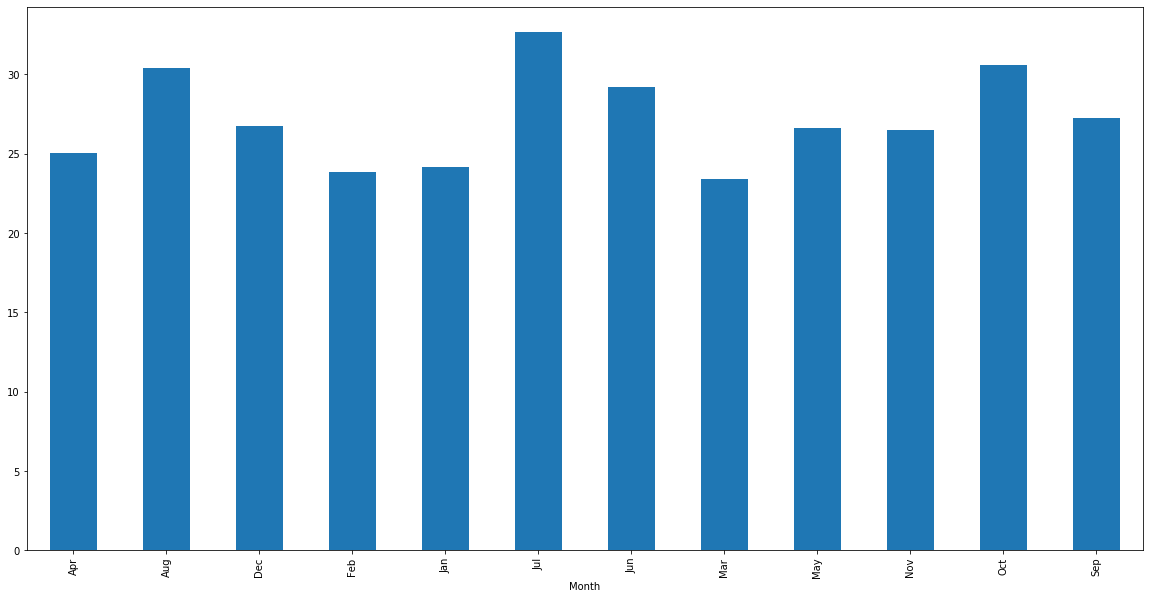

In [37]:
#BEGIN SOLUTION
months['std'].plot(kind="bar", figsize = (20,10))
#END SOLUTION


## Similarity to GroupBy<a name="_similarity to groupby"></a>

### Group by month using the mean aggregation. What do you notice?

In [39]:
#BEGIN SOLUTION
rain.groupby("Month").aggregate(np.mean)
#END SOLUTION

,Year,Rainfall
Month,,
Apr,1848.5,43.758278
Aug,1848.5,50.973597
Dec,1848.5,46.993399
Feb,1848.5,36.440397
Jan,1848.5,43.052980
Jul,1848.5,55.920530
Jun,1848.5,52.834437
Mar,1848.5,38.354305
May,1848.5,53.817881


### Group by year and month using the mean aggregation. What do you notice?


In [41]:
#BEGIN SOLUTION
rain.groupby(["Year","Month"]).aggregate(np.mean)
#END SOLUTION

Rainfall
Year Month          
1688 Apr         NaN
     Aug         9.0
     Dec        49.0
     Feb         NaN
     Jan         NaN
     Jul        47.0
     Jun        75.0
     Mar         NaN
     May         NaN
     Nov        44.0
     Oct        46.0
     Sep        43.0
1689 Apr        37.0
     Aug        41.0
     Dec        18.0
     Feb        22.0
     Jan        36.0
     Jul       116.0
     Jun        20.0
     Mar        22.0
     May        18.0
     Nov        66.0
     Oct        50.0
     Sep        45.0
1690 Apr        24.0
     Aug        79.0
     Dec         9.0
     Feb        32.0
     Jan        70.0
     Jul        73.0
...              ...
2007 Jun        53.0
     Mar        41.0
     May       102.0
     Nov        29.0
     Oct        42.0
     Sep        18.0
2008 Apr        51.0
     Aug        95.0
     Dec        29.0
     Feb        32.0
     Jan        49.0
     Jul        40.0
     Jun        15.0
     Mar        76.0
     May        67.0
     Nov        50.0
     Oct        61.0
     Sep        17.0
2009 Apr        42.0
     Aug         NaN
     Dec         NaN
     Feb        38.0
     Jan        46.0
     Jul         NaN
     Jun         NaN
     Mar        31.0
     May        71.0
     Nov         NaN
     Oct         NaN
     Sep         NaN

[3864 rows x 1 columns]

## Unpivoting a Pivot table<a name="_unpivoting a pivot table"></a>

### Show the first elements of `pivotedyear`

In [43]:
pivotedyear.head()

Month,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
Year,,,,,,,,,,,,
1688,NaN,9.0,49.0,NaN,NaN,47.0,75.0,NaN,NaN,44.0,46.0,43.0
1689,37.0,41.0,18.0,22.0,36.0,116.0,20.0,22.0,18.0,66.0,50.0,45.0
1690,24.0,79.0,9.0,32.0,70.0,73.0,63.0,43.0,68.0,23.0,64.0,21.0
1693,52.0,63.0,22.0,20.0,25.0,54.0,58.0,71.0,77.0,46.0,40.0,86.0
1694,7.0,34.0,11.0,14.0,5.0,90.0,36.0,10.0,24.0,50.0,13.0,28.0


### Unpivot the pivotedyear using `unstack()`, `reset_index()` `rename()`, and `set_index()`

#### Apply unstack() and reset_index()

In [44]:
#BEGIN SOLUTION
unpivoted = pivotedyear.unstack().reset_index()
#END SOLUTION

In [46]:
unpivoted.head()

,Month,Year,0
0,Apr,1688,NaN
1,Apr,1689,37.0
2,Apr,1690,24.0
3,Apr,1693,52.0
4,Apr,1694,7.0


#### Check the columns. What do you notice?

In [47]:
unpivoted.columns

Index(['Month', 'Year', 0], dtype='object')

#### Fix the columns name by using rename()

In [48]:
#BEGIN SOLUTION
unpivoted = unpivoted.rename(index=str, columns={0: "Rainfall"})
#END SOLUTION

In [50]:
unpivoted.head()

,Month,Year,Rainfall
0,Apr,1688,NaN
1,Apr,1689,37.0
2,Apr,1690,24.0
3,Apr,1693,52.0
4,Apr,1694,7.0


#### Set the year as the index of the rows usong `set_index(" ")`

In [51]:
#BEGIN SOLUTION
unpivoted = unpivoted.set_index("Year")
#END SOLUTION

In [53]:
unpivoted.head()

,Month,Rainfall
Year,,
1688,Apr,NaN
1689,Apr,37.0
1690,Apr,24.0
1693,Apr,52.0
1694,Apr,7.0


## Nested Pivoting<a name="_nested pivoting"></a>
To experiment with Nested pivoting, we will use the superstore data set `SuperstoreSales.csv` data. The file contains data about sales in a superstore. Data includes Order ID, date, quantity, Customer name, etc.

### Load the `SuperstoreSales.csv`. We use `encoding="latin1"` because the file is encoded in latin1 codec.
Notice the format of `Order Date` column.

In [54]:
#BEGIN SOLUTION
stores = pd.read_csv("data/SuperstoreSales.csv",encoding="latin1")
#END SOLUTION

In [56]:
stores.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,10/13/10,Low,6,261.5400,0.04,Regular Air,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/10
1,49,293,10/1/12,High,49,10123.0200,0.07,Delivery Truck,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/12
2,50,293,10/1/12,High,27,244.5700,0.01,Regular Air,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D¨ Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/12
3,80,483,7/10/11,High,30,4965.7595,0.08,Regular Air,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/11
4,85,515,8/28/10,Not Specified,19,394.2700,0.08,Regular Air,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/10


### Use  `parse_dates=["Order Date"]`  argument to specify `Order Date` as the date column and to read it in date format. 

In [57]:
#BEGIN SOLUTION
stores = pd.read_csv("data/SuperstoreSales.csv", encoding="latin1", parse_dates=["Order Date"])
#END SOLUTION

In [59]:
stores.head()

,Row ID,Order ID,Order Date,Order Priority,Order Quantity,Sales,Discount,Ship Mode,Unit Price,Shipping Cost,Customer Name,Province,Region,Customer Segment,Product Category,Product Sub-Category,Product Name,Product Container,Product Base Margin,Ship Date
0,1,3,2010-10-13,Low,6,261.5400,0.04,Regular Air,38.94,35.00,Muhammed MacIntyre,Nunavut,Nunavut,Small Business,Office Supplies,Storage & Organization,"Eldon Base for stackable storage shelf, platinum",Large Box,0.80,10/20/10
1,49,293,2012-10-01,High,49,10123.0200,0.07,Delivery Truck,208.16,68.02,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,"1.7 Cubic Foot Compact ""Cube"" Office Refrigera...",Jumbo Drum,0.58,10/2/12
2,50,293,2012-10-01,High,27,244.5700,0.01,Regular Air,8.69,2.99,Barry French,Nunavut,Nunavut,Consumer,Office Supplies,Binders and Binder Accessories,"Cardinal Slant-D¨ Ring Binder, Heavy Gauge Vinyl",Small Box,0.39,10/3/12
3,80,483,2011-07-10,High,30,4965.7595,0.08,Regular Air,195.99,3.99,Clay Rozendal,Nunavut,Nunavut,Corporate,Technology,Telephones and Communication,R380,Small Box,0.58,7/12/11
4,85,515,2010-08-28,Not Specified,19,394.2700,0.08,Regular Air,21.78,5.94,Carlos Soltero,Nunavut,Nunavut,Consumer,Office Supplies,Appliances,Holmes HEPA Air Purifier,Medium Box,0.50,8/30/10


### Pivot the table by Customer Segment and Region. Specify the values to be Sales. Aggregate the values by sum.

In [60]:
#BEGIN SOLUTION
segment_region = pd.pivot_table(data=stores, index=["Customer Segment", "Region"], values="Sales", aggfunc=sum)
#END SOLUTION

In [62]:
segment_region

Sales
Customer Segment Region                             
Consumer         Atlantic               6.047924e+05
                 Northwest Territories  6.773285e+04
                 Nunavut                2.725904e+04
                 Ontario                4.818603e+05
                 Prarie                 5.045554e+05
                 Quebec                 3.352536e+05
                 West                   8.378323e+05
                 Yukon                  2.043253e+05
Corporate        Atlantic               6.279933e+05
                 Northwest Territories  3.774939e+05
                 Nunavut                6.097802e+04
                 Ontario                1.112087e+06
                 Prarie                 1.291737e+06
                 Quebec                 4.632017e+05
                 West                   1.224662e+06
                 Yukon                  3.407518e+05
Home Office      Atlantic               4.079473e+05
                 Northwest Territories  1.940070e+05
                 Nunavut                2.294142e+04
                 Ontario                9.419356e+05
                 Prarie                 5.883269e+05
                 Quebec                 4.123416e+05
                 West                   7.390790e+05
                 Yukon                  2.581849e+05
Small Business   Atlantic               3.735153e+05
                 Northwest Territories  1.616135e+05
                 Nunavut                5.198010e+03
                 Ontario                5.273294e+05
                 Prarie                 4.526855e+05
                 Quebec                 2.993982e+05
                 West                   7.959759e+05
                 Yukon                  1.726054e+05